In [2]:
from pathlib import Path
figures_path = Path().resolve().parent / 'figures'
figures_path.mkdir(exist_ok=True)

## Fig 10: Coarse grained model illustration


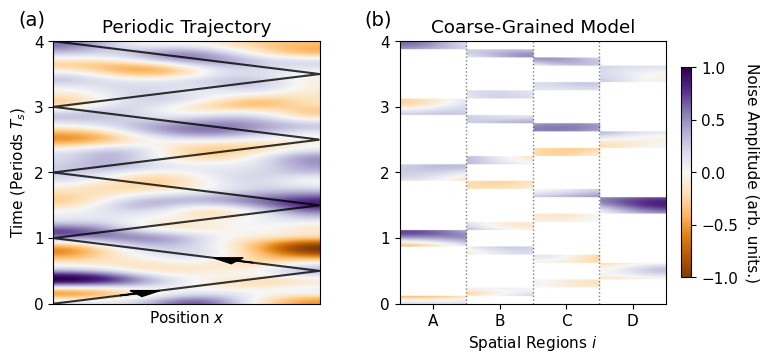

In [ ]:
# Misc Figures: Coarse-Grained Model Illustrations

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

def create_shuttling_illustration_v2():
    # ---------------------------------------------------------
    # Parameters
    # ---------------------------------------------------------
    n_space = 200        # Spatial resolution
    n_periods = 4.0      # Number of periods to illustrate
    points_per_period = 200
    n_time = int(n_periods * points_per_period) # Total time resolution
    n_buckets = 4        # Number of coarse-grained regions (M)
    
    # ---------------------------------------------------------
    # 1. Generate Spatially Varying Noise (The "Sheet")
    # ---------------------------------------------------------
    np.random.seed(42) 
    
    # Create raw random 
    # 
    #  for the extended time window
    noise_raw = np.random.randn(n_time, n_space)
    
    # Apply Gaussian filter to create correlation "blobs"
    sigma_time = 20
    sigma_space = 30 
    noise_smooth = gaussian_filter(noise_raw, sigma=(sigma_time, sigma_space))
    
    # Normalize noise to [-1, 1] for the PuOr colormap
    # This ensures the colormap is centered correctly
    noise_smooth = 2 * (noise_smooth - noise_smooth.min()) / (noise_smooth.max() - noise_smooth.min()) - 1

    # ---------------------------------------------------------
    # 2. Define Periodic Trajectory
    # ---------------------------------------------------------
    # Time axis from 0 to n_periods
    t_axis = np.linspace(0, n_periods, n_time)
    
    # Periodic triangular wave for position x(t). 
    # (t % 1) gives the time within the current period, creating the repetition.
    trajectory_x = 1 - np.abs(2 * (t_axis % 1) - 1)
    
    # ---------------------------------------------------------
    # 3. Create the Mask for the Coarse-Grained Model
    # ---------------------------------------------------------
    # Initialize mask with zeros
    mask_matrix = np.zeros((n_time, n_space))
    
    # Calculate the width of each bucket in spatial indices
    bucket_width_idx = n_space / n_buckets
    
    for i in range(n_time):
        pos = trajectory_x[i]
        
        # Determine which bucket index (0 to n_buckets-1) the position falls into
        bucket_idx = int(pos * n_buckets)
        if bucket_idx >= n_buckets: bucket_idx = n_buckets - 1
            
        # Determine the spatial columns corresponding to this bucket
        col_start = int(bucket_idx * bucket_width_idx)
        col_end = int((bucket_idx + 1) * bucket_width_idx)
        
        # Fill the mask for the active bucket at this time step
        mask_matrix[i, col_start:col_end] = 1.0

    # Apply the mask: Set values outside the active bucket to NaN (for transparency/white)
    masked_noise_nan = noise_smooth.copy()
    masked_noise_nan[mask_matrix == 0] = np.nan

    # ---------------------------------------------------------
    # 4. Plotting
    # ---------------------------------------------------------
    fig, axes = plt.subplots(1, 2, figsize=(8.5, 3.5), gridspec_kw={'width_ratios': [1, 1]})
    
    plt.subplots_adjust(wspace=0.3, bottom=0.15, top=0.9, right = 0.99, left = 0.06)
    # --- Plot A: Continuous Model ---
    ax0 = axes[0]
    # Plot the full continuous noise
    im0 = ax0.imshow(noise_smooth, aspect='auto', origin='lower', 
                     cmap='PuOr', extent=[0, 1, 0, n_periods], vmin=-1, vmax=1)
    
    # Plot the periodic trajectory
    ax0.plot(trajectory_x, t_axis, color='black', linewidth=1.5, linestyle='-', alpha=0.8)
    
    # Add illustrative arrows for the first period
    ax0.arrow(0.25, 0.125, 0.06, 0.03, head_width=0.1, head_length=0.1, fc='black', ec='black', zorder=10)
    ax0.arrow(0.75, 0.625, -0.06, 0.03, head_width=0.1, head_length=0.1, fc='black', ec='black', zorder=10)

    ax0.set_title("Periodic Trajectory")
    ax0.set_xlabel("Position $x$")
    ax0.set_ylabel("Time (Periods $T_s$)")
    ax0.set_xticks([])
    # Show tick marks for each period
    ax0.set_yticks(np.arange(0, n_periods + 0.1, 1))
    
    # --- Plot B: Coarse-Grained Buckets (Masked) ---
    ax1 = axes[1]
    
    # Configure colormap to show NaNs as white
    cmap = plt.cm.PuOr.copy()
    cmap.set_bad(color='white') 
    
    # Plot the masked noise
    ax1.imshow(masked_noise_nan, aspect='auto', origin='lower', 
               cmap=cmap, extent=[0, 1, 0, n_periods], vmin=-1, vmax=1)
    
    # Add vertical grid lines to separate buckets
    for b in range(1, n_buckets):
        ax1.axvline(x=b/n_buckets, color='black', linestyle=':', linewidth=1, alpha=0.5)
        
    ax1.set_title("Coarse-Grained Model")
    ax1.set_xlabel("Spatial Regions $i$")
    ax1.set_yticks(np.arange(0, n_periods + 0.1, 1))
    # ax1.set_yticklabels([]) # Uncomment to hide y-labels on the right plot
    
    # Label the x-axis with Bucket numbers at their centers
    # The extent is [0, 1], so we calculate centers in that coordinates
    bucket_centers = (np.arange(n_buckets) + 0.5) / n_buckets
    ax1.set_xticks(bucket_centers)
    ax1.set_xticklabels(["A", "B", "C", "D"])

    labels = ['(a)', '(b)']
    labels = ['(a)', '(b)']
 
    ax0.text(-0.03, 1.12, labels[0], transform=ax0.transAxes, 
                  fontsize=14, va='top', ha='right')
    ax1.text(-0.03, 1.12, labels[1], transform=ax1.transAxes, 
                  fontsize=14, va='top', ha='right')


    # plt.savefig('shuttling_model_illustration_v2.png', dpi=300)
    plt.savefig(f'{figures_path}/app_fig10_shuttling_model_illustration.pdf')
    
    


if __name__ == "__main__":
    create_shuttling_illustration_v2()

## Fig 14: LZSM Illustration

<>:82: SyntaxWarning: invalid escape sequence '\D'
<>:97: SyntaxWarning: invalid escape sequence '\s'
<>:82: SyntaxWarning: invalid escape sequence '\D'
<>:97: SyntaxWarning: invalid escape sequence '\s'
/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_68356/1212648216.py:82: SyntaxWarning: invalid escape sequence '\D'
  ax1.set_ylabel('Detuning $\Delta(x)$ (arb. units)')
/var/folders/wj/x78z9z710q7csr068fhd10bxk7mx3x/T/ipykernel_68356/1212648216.py:97: SyntaxWarning: invalid escape sequence '\s'
  ax2.annotate('Periodic Trajectory\n$x(t) \sim \cos(\omega_s t)$', xy=(0.5, 1.), xytext=(0.5, 1.2), ha='center', fontsize=10, color='#555')


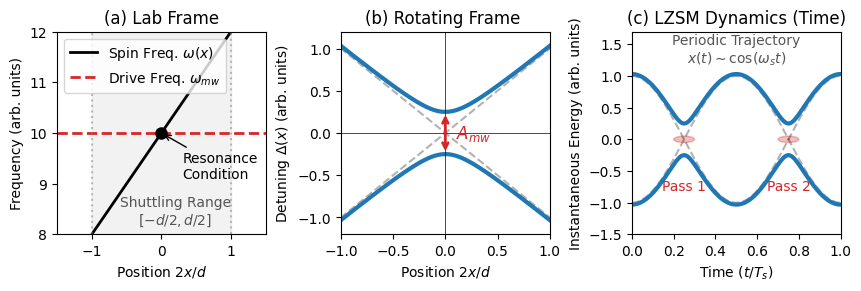

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def create_step_by_step_lzsm():
    # ---------------------------------------------------------
    # Parameters
    # ---------------------------------------------------------
    # Space domain
    x = np.linspace(-1.5, 1.5, 200)
    
    # Lab Frame
    omega_bar = 10.0 # Average freq (GHz approx)
    gradient = 2.0   # Gradient slope
    omega_z = omega_bar + gradient * x # Linear Zeeman
    omega_mw = omega_bar # Resonant drive
    
    # Rotating Frame
    Delta_x = gradient * x # Detuning vs position
    Ax = 0.5 # Rabi frequency (Gap)
    
    # Dressed energies vs Position (Static Picture)
    E_dressed_pos = np.sqrt(Delta_x**2 + Ax**2) / 2
    E_dressed_neg = -np.sqrt(Delta_x**2 + Ax**2) / 2
    
    # Time Domain (LZSM Dynamics)
    t = np.linspace(0, 1, 300) # One period
    x_t = 1.0 * np.cos(2 * np.pi * t) # Periodic trajectory x(t)
    Delta_t = gradient * x_t # Detuning vs time
    E_lzsm_pos = np.sqrt(Delta_t**2 + Ax**2) / 2
    E_lzsm_neg = -np.sqrt(Delta_t**2 + Ax**2) / 2
    
    # ---------------------------------------------------------
    # Plotting
    # ---------------------------------------------------------
    fig, axes = plt.subplots(1, 3, figsize=(8.5, 2.8), constrained_layout=True)
    
    # --- Panel 1: Lab Frame (Spatial) ---
    ax0 = axes[0]
    # Zeeman Splitting
    ax0.plot(x, omega_z, 'k-', linewidth=2, label=r'Spin Freq. $\omega(x)$')
    # Drive Frequency
    ax0.axhline(omega_mw, color='#d62728', linestyle='--', linewidth=2, label=r'Drive Freq. $\omega_{mw}$')
    
    # Shuttling Range
    ax0.axvline(-1, color='gray', linestyle=':', alpha=0.5)
    ax0.axvline(1, color='gray', linestyle=':', alpha=0.5)
    ax0.fill_betweenx([8, 12], -1, 1, color='gray', alpha=0.1)
    ax0.text(0.2, 8.2, 'Shuttling Range\n$[-d/2, d/2]$', ha='center', fontsize=10, color='#555')
    
    # Annotate Resonance
    ax0.plot(0, omega_bar, 'ko', markersize=8)
    ax0.annotate('Resonance\nCondition', xy=(0, omega_bar), xytext=(0.3, 9.1),
                 arrowprops=dict(facecolor='black', arrowstyle='->'), fontsize=10)
    
    ax0.set_title('(a) Lab Frame')
    ax0.set_xlabel('Position $2x/d$')
    ax0.set_ylabel('Frequency (arb. units)')
    ax0.legend(loc='upper left', frameon=True, fontsize=10)
    ax0.set_ylim(8, 12)
    ax0.set_xlim(-1.5, 1.5)

    # --- Panel 2: Rotating Frame (Spatial) ---
    ax1 = axes[1]
    # Diabatic (No Coupling) - Dashed
    ax1.plot(x, Delta_x/2, 'k--', alpha=0.3)
    ax1.plot(x, -Delta_x/2, 'k--', alpha=0.3, label='Uncoupled')
    
    # Dressed (Coupled) - Solid
    ax1.plot(x, E_dressed_pos, color='#1f77b4', linewidth=3, label='Dressed (+)')
    ax1.plot(x, E_dressed_neg, color='#1f77b4', linewidth=3, label='Dressed (-)')
    
    # Show Gap
    ax1.annotate('', xy=(0, Ax/2), xytext=(0, -Ax/2),
                 arrowprops=dict(arrowstyle='<->', color='#d62728', lw=2))
    ax1.text(0.1, 0, r'$A_{mw}$', color='#d62728', va='center', fontsize=12, fontweight='bold')
    
    ax1.axhline(0, color='black', linewidth=0.5)
    ax1.axvline(0, color='black', linewidth=0.5)
    
    ax1.set_title('(b) Rotating Frame ')
    ax1.set_xlabel('Position $2x/d$')
    ax1.set_ylabel('Detuning $\Delta(x)$ (arb. units)')
    ax1.set_xlim(-1, 1)
    ax1.set_ylim(-1.2, 1.2)

    # --- Panel 3: LZSM (Time Domain) ---
    ax2 = axes[2]
    # Diabatic
    ax2.plot(t, Delta_t/2, 'k--', alpha=0.3)
    ax2.plot(t, -Delta_t/2, 'k--', alpha=0.3)
    
    # Dressed
    ax2.plot(t, E_lzsm_pos, color='#1f77b4', linewidth=3)
    ax2.plot(t, E_lzsm_neg, color='#1f77b4', linewidth=3)
    
    # Add trajectory visual
    ax2.annotate('Periodic Trajectory\n$x(t) \sim \cos(\omega_s t)$', xy=(0.5, 1.), xytext=(0.5, 1.2), ha='center', fontsize=10, color='#555')
    
    # Highlight crossings
    for cross_t in [0.25, 0.75]:
        ax2.add_patch(plt.Circle((cross_t, 0), 0.05, color='#d62728', alpha=0.3))
        
    ax2.text(0.25, -0.8, 'Pass 1', ha='center', color='#d62728')
    ax2.text(0.75, -0.8, 'Pass 2', ha='center', color='#d62728')
    
    ax2.set_title('(c) LZSM Dynamics (Time)')
    ax2.set_xlabel('Time ($t/T_s$)')
    ax2.set_ylabel('Instantaneous Energy (arb. units)')
    ax2.set_xlim(0, 1)
    ax2.set_ylim(-1.5, 1.7)
    
    plt.savefig(f'{figures_path}/app_fig14_step_by_step_lzsm.pdf', dpi=300)

if __name__ == "__main__":
    create_step_by_step_lzsm()

## Fig 15: Noise in the LZSM

Simulating 10 noisy trajectories...


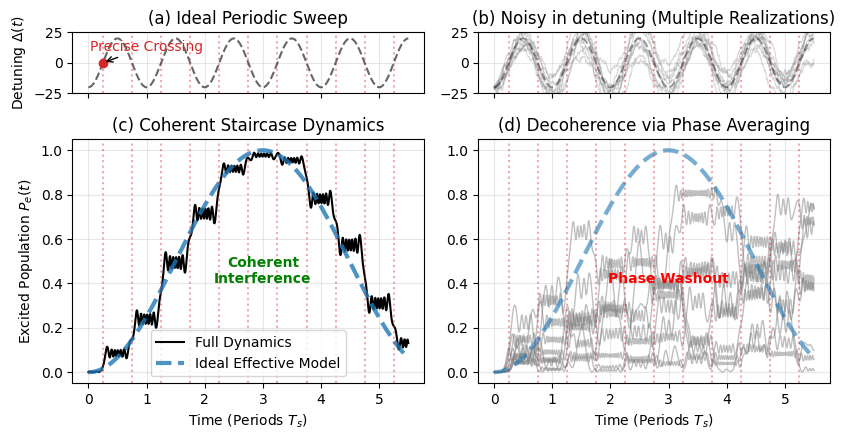

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
from scipy.special import jv

# ---------------------------------------------------------
# Mocking the OU_noise class inline for standalone execution
# ---------------------------------------------------------
class OU_noise:
    def __init__(self, sigma, gamma):
        """
        Ornstein-Uhlenbeck noise generator.
        dx = -gamma * x * dt + sigma * dW
        """
        self.sigma = sigma
        self.gamma = gamma
        self.x = 0.0
        
    def update(self, dt):
        # Euler-Maruyama integration
        dW = np.random.normal(0, np.sqrt(dt))
        dx = -self.gamma * self.x * dt + self.sigma * dW
        self.x += dx
        return self.x

def simulate_lzsm(noisy=False, noise_sigma=0.0):
    # ---------------------------------------------------------
    # Parameters
    # ---------------------------------------------------------
    ws = 1.0       # Unit frequency
    Ts = 2*np.pi/ws
    Az = 20.0      # Large amplitude
    Ax = 1.0       # Coupling
    
    # Time grid
    t_max = 5.5 * Ts
    steps = 1000
    times = np.linspace(0, t_max, steps)
    dt = times[1] - times[0]
    
    # ---------------------------------------------------------
    # Hamiltonian Simulation
    # ---------------------------------------------------------
    sz = np.array([[1, 0], [0, -1]])
    sx = np.array([[0, 1], [1, 0]])
    psi = np.array([0, 1], dtype=complex) # Initial State |g>
    
    pop_e = np.zeros(steps)
    detuning_trace = np.zeros(steps)
    
    # Generate Noise
    # Note: We re-instantiate noise here to ensure unique seeds per call
    noise_gen = OU_noise(noise_sigma if noisy else 0.0, gamma=1.0/Ts)
    noise_signal = [noise_gen.update(dt) for _ in range(steps)]

    for i, t in enumerate(times):
        # Current detuning value (Ideal + Noise)
        current_detuning = -Az * np.cos(ws * t) + noise_signal[i]
        detuning_trace[i] = current_detuning
        
        # Hamiltonian H(t) = 0.5 * (Delta*sz + Omega*sx)
        H_t = 0.5 * (current_detuning * sz + Ax * sx)
        
        # Time evolution U = exp(-i*H*dt)
        U_step = expm(-1j * H_t * dt)
        psi = U_step @ psi
        pop_e[i] = np.abs(psi[0])**2

    # ---------------------------------------------------------
    # Effective Model (RWA) - Reference
    # ---------------------------------------------------------
    # Effective Rabi frequency via Bessel function
    Omega_eff = Ax * jv(0, Az/ws)
    pop_eff = np.sin(Omega_eff * times / 2)**2
   
    return times, Ts, detuning_trace, pop_e, pop_eff, Ax, Az, ws

def create_comparison_plot():
    # Setup 2x2 Plot with increased spacing between subplots
    fig, axes = plt.subplots(
        2, 2, figsize=(8.5, 4.5), sharex=True,
        gridspec_kw={'height_ratios': [0.5, 2]}
    )
    # Set figure and axes facecolor to white to remove gray background
    fig.patch.set_facecolor('white')
    for ax in axes.flatten():
        ax.set_facecolor('white')

    # Define common crossings for vertical lines (ideal case)
    crossings = [0.25, 0.75, 1.25, 1.75, 2.25, 2.75, 3.25, 3.75, 4.25, 4.75, 5.25]

    # -----------------------
    # LEFT COLUMN: CLEAN (Single Trajectory)
    # -----------------------
    t1, Ts, det1, pop1, eff1, Ax, Az, ws = simulate_lzsm(noisy=False)

    # Top Left: Detuning
    axes[0,0].plot(t1/Ts, det1, 'k--', alpha=0.6)
    axes[0,0].set_title(r"(a) Ideal Periodic Sweep")
    axes[0,0].set_ylabel(r'Detuning $\Delta(t)$')

    # Bottom Left: Dynamics
    axes[1,0].plot(t1/Ts, pop1, color='black', linewidth=1.5, label='Full Dynamics')
    axes[1,0].plot(t1/Ts, eff1, color='#1f77b4', linewidth=3, linestyle='--', alpha=0.8, label='Ideal Effective Model')
    axes[1,0].set_title(r"(c) Coherent Staircase Dynamics")
    axes[1,0].set_ylabel(r'Excited Population $P_e(t)$')

    # -----------------------
    # RIGHT COLUMN: NOISY (Multiple Trajectories)
    # -----------------------
    num_trajectories = 10
    noise_magnitude = 5

    # We will accumulate population data to calculate an average later
    pop_accum = np.zeros_like(pop1)

    print(f"Simulating {num_trajectories} noisy trajectories...")

    for k in range(num_trajectories):
        t2, _, det2, pop2, eff2, _, _, _ = simulate_lzsm(noisy=True, noise_sigma=noise_magnitude)
        pop_accum += pop2

        # Plot individual trajectories with high transparency
        # Top Right: Detuning Jitter
        axes[0,1].plot(t2/Ts, det2, color='gray', linewidth=0.8, alpha=0.3)

        # Bottom Right: Population Jitter
        axes[1,1].plot(t2/Ts, pop2, color='gray', linewidth=1.0, alpha=0.5)

    # Plot the Ideal Detuning Reference on Top Right for context
    axes[0,1].plot(t1/Ts, det1, 'k--', alpha=0.4, label='Ideal Path')
    axes[0,1].set_title(r"(b) Noisy in detuning (Multiple Realizations)")

    # Plot the Average Population on Bottom Right
    #pop_avg = pop_accum / num_trajectories
    #axes[1,1].plot(t2/Ts, pop_avg, color='red', linewidth=2, label='Ensemble Average')
    axes[1,1].plot(t2/Ts, eff2, color='#1f77b4', linewidth=3, linestyle='--', alpha=0.6, label='Ideal Effective Model')
    axes[1,1].set_title(r"(d) Decoherence via Phase Averaging")
    axes[1,0].legend(loc='lower center')

    # -----------------------
    # COMMON STYLING
    # -----------------------
    for ax in axes.flatten():
        ax.grid(True, alpha=0.3)
        # Mark Ideal Crossings
        for c in crossings:
            if c*Ts < t1[-1]:
                ax.axvline(c, color='#d62728', linestyle=':', alpha=0.4)

   
    axes[1,0].set_xlabel(r'Time (Periods $T_s$)')
    axes[1,1].set_xlabel(r'Time (Periods $T_s$)')

    axes[1,0].set_ylim(-0.05, 1.05)
    axes[1,1].set_ylim(-0.05, 1.05)

    # Annotations
    axes[0,0].plot(crossings[0], 0, 'o', color='#d62728')
    axes[0,0].annotate("Precise Crossing", xy=(crossings[0], 0), xytext=(1, 10),
                 arrowprops=dict(facecolor='#d62728', arrowstyle='->'), ha='center', color='#d62728')

    axes[1,0].text(3, 0.4, "Coherent\nInterference", ha='center', color='green', fontweight='bold')
    axes[1,1].text(3, 0.4, "Phase Washout", ha='center', color='red', fontweight='bold')

    axes[0,0].set_ylim(-25, 25)
    axes[0,1].set_ylim(-25, 25)

    plt.tight_layout()
    plt.savefig(f'{figures_path}/app_fig15_lzsm_comparison_trajectories.pdf')
    plt.show()
if __name__ == "__main__":
    create_comparison_plot()

## Fig 13: Filtering of the noise during the shuttle

Plot shuttling_filter_3bucket_W_interference.png saved.


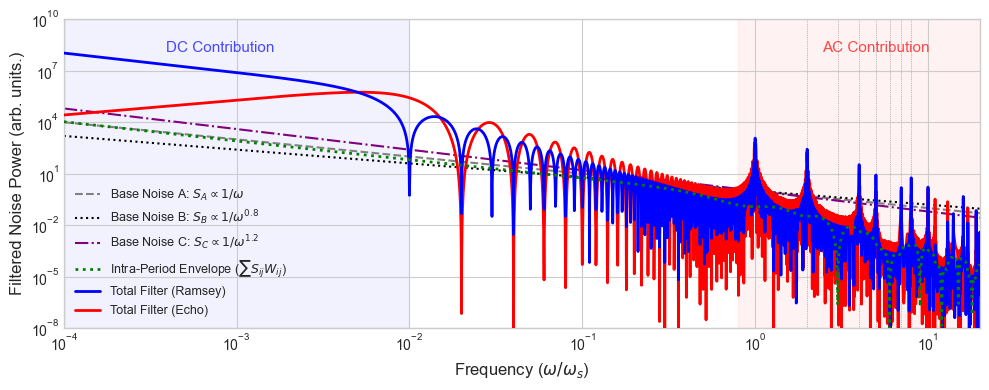

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define physical parameters for the simulation ---
N = 100      # Number of shuttling cycles (MUST be even)
M = 3        # Number of buckets (A, B, C)
Ts = 1.0     # Period of one cycle (e.g., in nanoseconds)

# Correlation coefficients
r_AB = 0.4
r_AC = 0.2 # Negative correlation for interesting interference
r_BC = 0.4

# Derived parameters
ws = 2 * np.pi / Ts       # Shuttling frequency (rad/ns)
num_segments = 2 * M      # Sequence {A,B,C,C,B,A} -> 6 segments
dt = Ts / num_segments    # Time spent in one segment (Delta t)
T_total = N * Ts          # Total sequence time (tau)

# --- 2. Define the filter and noise functions ---

# Unnormalized sinc function: sin(x)/x
def sinc(x):
    return np.divide(np.sin(x), x, out=np.ones_like(x), where=x!=0)

# a) The base noise spectrum
def noise_spectrum(omega, alpha=1.0):
    return 1 / ((omega + 1e-18)**alpha)

# b) Single-segment filter (Ramsey filter for duration dt)
def single_segment_filter(omega, dt):
    return (dt**2) * (sinc(omega * dt / 2)**2)

# c) Ramsey Comb Filter (Periodic shuttling for N periods)
def G_Ramsey(omega, N, Ts):
    num = np.sin(N * omega * Ts / 2)**2
    den = np.sin(omega * Ts / 2)**2
    return np.divide(num, den, out=np.full_like(omega, N**2), where=den!=0)

# d) Echo Comb Filter (Periodic shuttling with 1 echo pulse at N/2)
def G_Echo(omega, N, Ts):
    num = 4 * (np.sin(N * omega * Ts / 4)**4)
    den = np.sin(omega * Ts / 2)**2
    return np.divide(num, den, out=np.zeros_like(omega), where=den!=0)

# e) Intra-period structure factors K_ij for sequence {A, B, C, C, B, A}
# m = {1, 2, 3, 4, 5, 6} -> k_m = {A, B, C, C, B, A}
# dt_diff = (m-p)*dt
def K_AA(omega, dt): # A at m={1,6}
    return 2 + 2 * np.cos(5 * omega * dt) # (6-1) = 5

def K_BB(omega, dt): # B at m={2,5}
    return 2 + 2 * np.cos(3 * omega * dt) # (5-2) = 3

def K_CC(omega, dt): # C at m={3,4}
    return 2 + 2 * np.cos(1 * omega * dt) # (4-3) = 1

def K_AB(omega, dt): # A at {1,6}, B at {2,5}
    # Pairs (1,2) -> -1dt, (1,5) -> -4dt, (6,2) -> 4dt, (6,5) -> 1dt
    return 2 * np.cos(1 * omega * dt) + 2 * np.cos(4 * omega * dt)

def K_AC(omega, dt): # A at {1,6}, C at {3,4}
    # Pairs (1,3) -> -2dt, (1,4) -> -3dt, (6,3) -> 3dt, (6,4) -> 2dt
    return 2 * np.cos(2 * omega * dt) + 2 * np.cos(3 * omega * dt)

def K_BC(omega, dt): # B at {2,5}, C at {3,4}
    # Pairs (2,3) -> -1dt, (2,4) -> -2dt, (5,3) -> 2dt, (5,4) -> 1dt
    return 2 * np.cos(1 * omega * dt) + 2 * np.cos(2 * omega * dt)

# --- 3. Set up frequency axis and calculate filters ---

# Frequency axis (logarithmic scale)
omega = np.logspace(-4, 2, 5000) * ws

# Calculate base noise spectra
S_A = noise_spectrum(omega, 1.0)
S_B = noise_spectrum(omega, 0.8)
S_C = noise_spectrum(omega, 1.2) # New spectrum

# Normalize noise spectra by their values at ws
S_A /= noise_spectrum(np.array([ws]), 1.0)
S_B /= noise_spectrum(np.array([ws]), 0.8)
S_C /= noise_spectrum(np.array([ws]), 1.2)

# Calculate K_ij structure factors
Kaa = K_AA(omega, dt)
Kbb = K_BB(omega, dt)
Kcc = K_CC(omega, dt) # New
Kab = K_AB(omega, dt)
Kac = K_AC(omega, dt) # New
Kbc = K_BC(omega, dt) # New

# Calculate the "Effective Spatiotemporal Spectrum" (sum over i,j of S_ij * K_ij)
# S_eff = S_A*K_AA + S_B*K_BB + S_C*K_CC + 2*r_AB*sqrt(S_A*S_B)*K_AB + 2*r_AC*sqrt(S_A*S_C)*K_AC + 2*r_BC*sqrt(S_B*S_C)*K_BC
S_eff_sum_K = (S_A * Kaa) + (S_B * Kbb) + (S_C * Kcc) + \
              (2 * r_AB * np.sqrt(S_A * S_B) * Kab) + \
              (2 * r_AC * np.sqrt(S_A * S_C) * Kac) + \
              (2 * r_BC * np.sqrt(S_B * S_C) * Kbc)

# Get the other filters
F1_filter = single_segment_filter(omega, dt)
G_R_comb = G_Ramsey(omega, N, Ts)
G_E_comb = G_Echo(omega, N, Ts)

# Calculate the total intra-period spectrum (S_eff_sum_K * F1_filter)
# This is the sum S_ij * W_ij
Total_W_Spectrum = S_eff_sum_K * F1_filter

# Calculate the TOTAL filtered spectra
Total_Filter_Ramsey = Total_W_Spectrum * G_R_comb
Total_Filter_Echo = Total_W_Spectrum * G_E_comb


# --- 4. Plot the results on a single figure ---

plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(1, 1, figsize=(10, 4))

# --- Mark DC and AC regions ---
ax.axvspan(omega[0]/ws, 0.01, color='blue', alpha=0.05, zorder=0)
ax.text(1e-4*8, 2*1e8, 'DC Contribution', ha='center', va='center', fontsize=11, color='blue', alpha=0.7)
ax.axvspan(0.8, omega[-1]/ws, color='red', alpha=0.05, zorder=0)
ax.text(5, 2*1e8, 'AC Contribution', ha='center', va='center', fontsize=11, color='red', alpha=0.7)

# Plot the base noise spectra
ax.plot(omega / ws, S_A, color='gray', lw=1.5, ls='--', 
        label=r'Base Noise A: $S_A \propto 1/\omega$')
ax.plot(omega / ws, S_B, color='black', lw=1.5, ls=':', 
        label=r'Base Noise B: $S_B \propto 1/\omega^{0.8}$')
ax.plot(omega / ws, S_C, color='purple', lw=1.5, ls='-.', 
        label=r'Base Noise C: $S_C \propto 1/\omega^{1.2}$') # New base noise

# Plot the total intra-period W_ij contribution
ax.plot(omega / ws, Total_W_Spectrum, color='green', lw=2, ls=':', 
        label=r'Intra-Period Envelope ($\sum S_{ij} W_{ij}$)', zorder=25)

# Plot the total Ramsey-filtered noise
ax.plot(omega / ws, Total_Filter_Ramsey, color='blue', lw=2, 
        label=r'Total Filter (Ramsey)', zorder=10)

# Plot the total Echo-filtered noise
ax.plot(omega / ws, Total_Filter_Echo, color='red', lw=2, 
        label=r'Total Filter (Echo)', zorder=9)

# Formatting the plot
ax.set_xlabel(r'Frequency ($\omega / \omega_s$)', fontsize=12)
ax.set_ylabel("Filtered Noise Power (arb. units.)", fontsize=12)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim(1e-4, 2*1e1)
ax.set_ylim(1e-8, 1e10) # Adjusted ylim
ax.legend(fontsize=9, loc='lower left',ncol=1) # Adjusted font size to fit

# Add vertical lines for harmonics
for k in range(1, int(1.5*num_segments)): # Plot more harmonics relevant to K_ij's
    ax.axvline(k, color='gray', ls=':', lw=0.5, zorder=0)

plt.tight_layout()
plt.savefig(f"{figures_path}/app_fig13shuttling_filter_3bucket_W_interference.pdf")

print("Plot shuttling_filter_3bucket_W_interference.png saved.")

## Fig. 8: Rotation of the quantization axis during diabatic passage

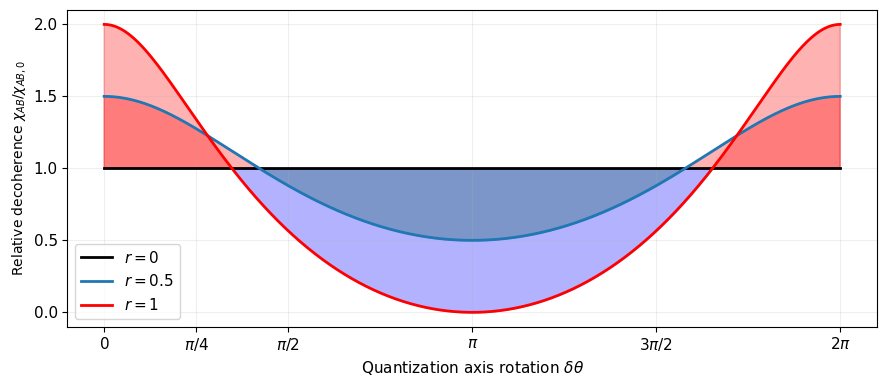

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['font.size'] = 11
# Parameters
chi_A = 0.5
chi_B = 0.5

# Range of delta_theta from 0 to 2pi
delta_theta = np.linspace(0, 2 * np.pi, 500)

# Calculate values for r=0 and r=0.5
y_r0 = []
y_r05 = []

for r in [0, 0.5, 1]:
    # Gamma formula
    term1 = np.exp(-(chi_A + chi_B + 2*r*np.sqrt(chi_A*chi_B))) * np.cos(delta_theta/2)**2
    term2 = np.exp(-(chi_A + chi_B - 2*r*np.sqrt(chi_A*chi_B))) * np.sin(delta_theta/2)**2
    term12 = np.exp(-(chi_A + chi_B))
    Gamma = term1 + term2
    T212 = np.log(Gamma)
    T2 = np.log(term12)
    y = T212/T2
    if r == 0:
        y_r0 = y
    elif r == 0.5:
        y_r05 = y
    elif r == 1:
        y_r1 = y

plt.figure(figsize=(9, 4))

# Plot r=0 in black
plt.plot(delta_theta, y_r0, color='black', label=r"$r=0$", linewidth=2)

# Plot r=0.5
plt.plot(delta_theta, y_r05, label=r"$r=0.5$", linewidth=2)

plt.plot(delta_theta, y_r1, color = "red", label=r"$r=1$", linewidth=2)


# Fill between the curves: red when r=0.5 > r=0, blue when r=0.5 < r=0
mask_above = y_r05 > y_r0
mask_below = y_r05 < y_r0

# Fill red where r=0.5 is above r=0
if np.any(mask_above):
    plt.fill_between(delta_theta, y_r0, y_r05, where=mask_above, 
                     color='red', alpha=0.3, interpolate=True)

# Fill blue where r=0.5 is below r=0
if np.any(mask_below):
    plt.fill_between(delta_theta, y_r0, y_r05, where=mask_below, 
                     color='green', alpha=0.3, interpolate=True)

# Fill between r=1 and r=0: red when r=1 > r=0, blue when r=1 < r=0
mask_above_r1 = y_r1 > y_r0
mask_below_r1 = y_r1 < y_r0

# Fill red where r=1 is above r=0
if np.any(mask_above_r1):
    plt.fill_between(delta_theta, y_r0, y_r1, where=mask_above_r1, 
                     color='red', alpha=0.3, interpolate=True)

# Fill blue where r=1 is below r=0
if np.any(mask_below_r1):
    plt.fill_between(delta_theta, y_r0, y_r1, where=mask_below_r1, 
                     color='blue', alpha=0.3, interpolate=True)

plt.xlabel(r'Quantization axis rotation $\delta\theta$')
plt.ylabel(r'Relative decoherence $\chi_{AB}/\chi_{AB,0}$', fontsize=10)
plt.legend()
plt.grid(True, alpha=0.2)
plt.yticks([0,0.5,1,1.5,2])
# Set x-axis ticks to show π/2, π, 3π/2, 2π
plt.xticks([0, np.pi/4, np.pi/2, np.pi, 3*np.pi/2, 2*np.pi], 
           [r'$0$', r'$\pi/4$', r'$\pi/2$', r'$\pi$', r'$3\pi/2$', r'$2\pi$'])

plt.tight_layout()
plt.savefig(f'{figures_path}/app_fig8_spatial_rot_theta.pdf', dpi=150)
plt.show()


## Fig 9: Displacement along y-direciton

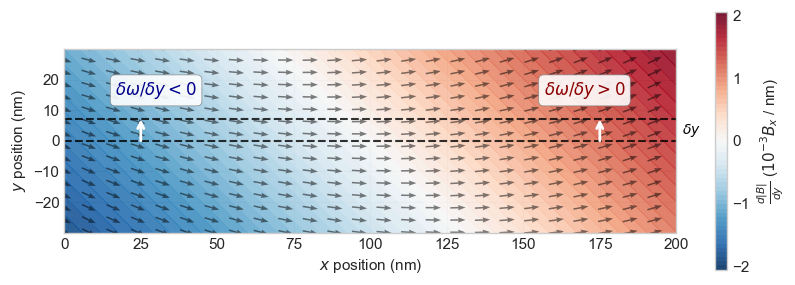

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

# --- Publication Quality Settings ---
# These settings emulate LaTeX fonts without needing a local TeX installation


# --- Data Generation ---
# Grid setup
x_range = np.linspace(0, 200, 200) # High resolution for smooth contours
y_range = np.linspace(-50, 50, 200)
X, Y = np.meshgrid(x_range, y_range)

# Physics Parameters
bx = 10.0           # Strong longitudinal field
dby = 0.04          # Gradient strength
x0_plus_y0 = 100    # Sweet spot center parameter

# Calculate Fields
By = dby * (Y + X - x0_plus_y0)
Bx = np.full_like(By, bx)
B_mag = np.sqrt(Bx**2 + By**2)

# Calculate Gradient: d|B|/dy
# Formula: (By * dby) / |B|
dB_dy = (By * dby) / B_mag

# --- Plotting ---
fig, ax = plt.subplots(figsize=(8.5, 3))

# 1. The Gradient Field (Color Contour)
# We find the max absolute value to center the colormap perfectly at 0 (white)
max_val = np.max(np.abs(dB_dy))/bx*1000
levels = np.linspace(-max_val, max_val, 60) # High number of levels for smooth gradient

# 'RdBu_r' is Red-Blue reversed (Blue=Negative, Red=Positive)
contour = ax.contourf(X, Y, 1000*dB_dy/bx, levels=levels, cmap='RdBu_r', alpha=0.9)

# 2. The Sweet Spot Line (dashed)
x_line = np.linspace(0, 200, 100)
y_line = 0 * np.ones_like(x_line)
ax.plot(x_line, y_line, 'k--', linewidth=1.5, alpha=0.8)

# 3. Field Vectors (Quiver)
# We must subsample the grid, otherwise arrows will be too dense
step = 8
U = Bx[::step, ::step] / B_mag[::step, ::step]
V = By[::step, ::step] / B_mag[::step, ::step]
X_q = X[::step, ::step]
Y_q = Y[::step, ::step]

ax.quiver(X_q, Y_q, U, V, color='black', pivot='mid', 
          scale=40, width=0.0025, headwidth=3.5, alpha=0.5)

# 4. Colorbar

# 5. Annotations (Clean boxes)
props = dict(boxstyle='round', facecolor='white', alpha=0.9, edgecolor='gray', linewidth=0.5)

# Place labels in the negative (blue) and positive (red) regions
ax.text(30, 15, r'$\delta \omega/\delta y < 0$', fontsize=12, color='darkblue', bbox=props, ha='center')
ax.text(170, 15, r'$\delta \omega/\delta y > 0$', fontsize=12, color='darkred', bbox=props, ha='center')

# 6. Axis Labels and Title
ax.set_xlabel(r'$x$ position (nm)')
ax.set_ylabel(r'$y$ position (nm)')

# Limits and Legend
ax.set_xlim(0, 200)
ax.set_ylim(-30, 30)
ax.set_yticks([-20,-10, 0, 10,20])
cbar = plt.colorbar(contour, ax=ax, label=r"$\frac{d|B|}{dy}$ ($10^{-3} B_x$ / nm)", shrink=1)
cbar.ax.set_yticks([-2,-1,0,1,2])
ax.set_aspect('equal')
# Add another dashed line at y=5 nm, same x range
y_line_shift = 7 * np.ones_like(x_line)
ax.plot(x_line, y_line_shift, 'k--', linewidth=1.5, alpha=0.8)

# Add arrows at x=25 and x=175, from y=0 to y=5
arrow_props = dict(arrowstyle='->', color='white', linewidth=2, shrinkA=0, shrinkB=0)
ax.annotate('', xy=(25, 7), xytext=(25, 0), arrowprops=arrow_props)
ax.annotate('', xy=(175, 7), xytext=(175, 0), arrowprops=arrow_props)
# Add $\delta y$ text label outside of plot between dashed y=0 and y=7 nm lines, on the right edge
ax.text(202, 3.5, r"$\delta y$", fontsize=10, color='black', va='center', ha='left', rotation=0)
# Show/Save
# Note: tight_layout() is not needed when using constrained_layout=True in subplots()
plt.subplots_adjust(bottom=0.10, right=0.99, left = 0.09, top=0.96)
plt.savefig(f'{figures_path}/app_fig9_spatial_sensitivity_pub.pdf', dpi=150)

plt.show()